# Figures S3 and S4

This notebook loads the data and produces figures S3 and S4. 

In [1]:
savedate = '20251031'

In [2]:
figure_path = '' # path to figures folder
data_path = '' # path to load data

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None
import geopandas as geopd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Load and process data

In [4]:
# Load BG-level data
df_bg_level = pd.read_csv(data_path + '23_level_BG_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_bg_level['STATEFP'] = df_bg_level['STATEFP'].str.zfill(2)
df_bg_level['COUNTYFP'] = df_bg_level['COUNTYFP'].str.zfill(5)

# Load CT_level data
df_ct_level = pd.read_csv(data_path + '23_level_CT_US_imputedquantiles_20250722.zip',dtype={'GEOID':str,'STATEFP':str,'COUNTYFP':str,'BGFIPS':str},index_col=0)
df_ct_level['STATEFP'] = df_ct_level['STATEFP'].str.zfill(2)
df_ct_level['COUNTYFP'] = df_ct_level['COUNTYFP'].str.zfill(5)

# Sum with state-level quantiles
t1 = df_bg_level.groupby('income_quantile_county_state_imputed')['no_stations'].sum()
t2 = df_ct_level.groupby('income_quantile_CT_state_imputed')['no_stations'].sum()
t3 = df_bg_level.groupby('income_quantile_bg_state_imputed')['no_stations'].sum()

# Sum with US-level quantiles
t1_us = df_bg_level.groupby('income_quantile_county_US_imputed')['no_stations'].sum()
t2_us = df_ct_level.groupby('income_quantile_CT_US_imputed')['no_stations'].sum()
t3_us = df_bg_level.groupby('income_quantile_bg_US_imputed')['no_stations'].sum()

# Figure S3
US level

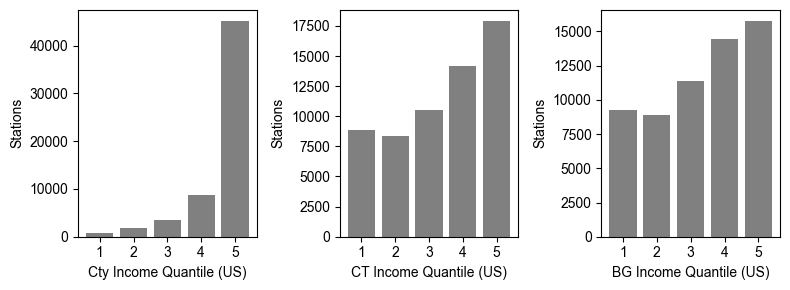

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=False, sharex=True)
axes[0].bar(t1_us.keys(), [t1_us[key] for key in t1_us.keys()], color='grey')
axes[0].set_xlabel('Cty Income Quantile (US)')
axes[0].set_ylabel('Stations')

axes[1].bar(t2_us.keys(), [t2_us[key] for key in t2_us.keys()], color='grey')
axes[1].set_xlabel('CT Income Quantile (US)')
axes[1].set_ylabel('Stations')

axes[2].bar(t3_us.keys(), [t3_us[key] for key in t3_us.keys()], color='grey')
axes[2].set_xlabel('BG Income Quantile (US)')
axes[2].set_ylabel('Stations')

for i in range(3):
    axes[i].set_xticks(np.arange(1, 6))

plt.tight_layout()
plt.savefig(figure_path+'figureS3_number_of_stations_split_NOTnormalized_all_USlevel_'+savedate+'.png', bbox_inches='tight')
plt.savefig(figure_path+'figureS3_number_of_stations_split_NOTnormalized_all_USlevel_'+savedate+'.pdf', bbox_inches='tight')
plt.show()

# Figure S4
State level

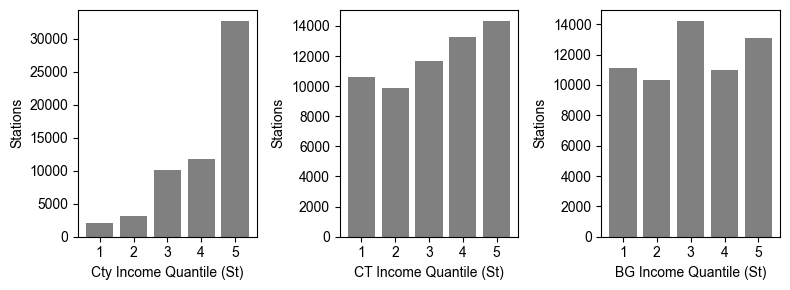

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=False, sharex=True)
axes[0].bar(t1.keys(), [t1[key] for key in t1.keys()], color='grey')
axes[0].set_xlabel('Cty Income Quantile (St)')
axes[0].set_ylabel('Stations')

axes[1].bar(t2.keys(), [t2[key] for key in t2.keys()], color='grey')
axes[1].set_xlabel('CT Income Quantile (St)')
axes[1].set_ylabel('Stations')

axes[2].bar(t3.keys(), [t3[key] for key in t3.keys()], color='grey')
axes[2].set_xlabel('BG Income Quantile (St)')
axes[2].set_ylabel('Stations')

for i in range(3):
    axes[i].set_xticks(np.arange(1, 6))

plt.tight_layout()
plt.savefig(figure_path+'figureS4_number_of_stations_split_NOTnormalized_all_statelevel_'+savedate+'.png', bbox_inches='tight')
plt.savefig(figure_path+'figureS4_number_of_stations_split_NOTnormalized_all_statelevel_'+savedate+'.pdf', bbox_inches='tight')
plt.show()